# Лабораторная работа №6 Построение модели линейной одномерной регрессии
                                                                                                        
## Сергеев Никита 
Вариант 16
## Ход работы:
### Цель работы

изучение принципов построения модели линейной одномерной регрессии.

### Задачи 

 - реализовать каонвейер для выполнения всех стадий обработки данных при решении задачи одномерной регрессии;
 - получение теоретических представлений о задаче регресии;
 - получение навыков использования пайплайна при решении задачи машинного обучения;
 - получение навыков рефакторинга кода в задачах машинного обучения. 

## Ход работы:

### Загружаем набор данных

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
dataset = pd.read_csv('./lab06_16/dataset/train.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Удаляем пустые строки с пустыми значениями класса

In [14]:
dataset = dataset.loc[:, ["Fare", "Pclass"]]
dataset = dataset.dropna(subset=["Pclass"])
dataset.head()

,Fare,Pclass
0,7.2500,3
1,71.2833,1
2,7.9250,3
3,53.1000,1
4,8.0500,3


### Разделяем на матрицу признаков и зависимую переменную

In [15]:
y = dataset.loc[:, "Fare"].values
X = dataset.loc[:, "Pclass"].values
print ("Матрица признаков"); print(X[:5])
print ("Зависимая переменная"); print(y[:5])
# X = X.reshape(-1, 1)

Матрица признаков
[3 1 3 1 3]
Зависимая переменная
[ 7.25   71.2833  7.925  53.1     8.05  ]


### Обрабатываем пустые значения

In [16]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(y.reshape(-1, 1)[:, :])
y_without_nan = y.reshape(-1, 1).copy()
y_without_nan[:, :] = imputer.transform(y.reshape(-1, 1)[:, :])
y_without_nan[:10]

array([[ 7.25  ],
       [71.2833],
       [ 7.925 ],
       [53.1   ],
       [ 8.05  ],
       [ 8.4583],
       [51.8625],
       [21.075 ],
       [11.1333],
       [30.0708]])

### Загрузим и обработаем тестовые данные

In [19]:
dataset_test = pd.read_csv('./lab06_16/dataset/test.csv')
dataset_test = dataset_test.loc[:, ["Fare", "Pclass"]]
dataset_test = dataset_test.dropna(subset=["Pclass"])
dataset_test = dataset_test.dropna(subset=["Fare"])

In [20]:
y_test = dataset_test.loc[:, "Fare"].values.reshape(-1, 1)
X_test = dataset_test.loc[:, "Pclass"].values.reshape(-1, 1)
print ("Матрица признаков"); print(X[:5])
print ("Зависимая переменная"); print(y[:5])

Матрица признаков
[3 1 3 1 3]
Зависимая переменная
[ 7.25   71.2833  7.925  53.1     8.05  ]


In [21]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(y_test.reshape(-1, 1)[:, :])
y_test = y_test.reshape(-1, 1).copy()
y_test[:, :] = imputer.transform(y_test.reshape(-1, 1)[:, :])
y_test[:10]

array([[ 7.8292],
       [ 7.    ],
       [ 9.6875],
       [ 8.6625],
       [12.2875],
       [ 9.225 ],
       [ 7.6292],
       [29.    ],
       [ 7.2292],
       [24.15  ]])

### Обучаем линейную модель регрессии

In [22]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
y_without_nan = y_without_nan.reshape(-1, 1)
regressor.fit(y_without_nan, X)

LinearRegression()

### Предсказание, обработка и визуализация результатов

[2.57863786 2.57863786 2.58788297 2.57863786 2.57863786 2.57863786
 2.57863786 2.58788297 2.57863786 2.57863786 2.57863786 2.59712807
 2.59712807 2.58788297 2.59712807 2.58788297 2.58788297 2.57863786
 2.57863786 2.57863786 2.59712807 2.57863786 2.59712807 2.59712807
 2.59712807 2.57863786 2.59712807 2.57863786 2.59712807 2.57863786
 2.58788297 2.58788297 2.57863786 2.57863786 2.59712807 2.57863786
 2.57863786 2.57863786 2.57863786 2.57863786 2.57863786 2.59712807
 2.57863786 2.58788297 2.59712807 2.57863786 2.59712807 2.57863786
 2.59712807 2.57863786 2.59712807 2.58788297 2.58788297 2.59712807
 2.58788297 2.57863786 2.57863786 2.57863786 2.57863786 2.59712807
 2.57863786 2.58788297 2.57863786 2.57863786 2.59712807 2.58788297
 2.57863786 2.59712807 2.59712807 2.59712807 2.57863786 2.57863786
 2.57863786 2.59712807 2.59712807 2.59712807 2.57863786 2.59712807
 2.58788297 2.57863786 2.57863786 2.59712807 2.59712807 2.57863786
 2.58788297 2.57863786 2.57863786 2.57863786 2.57863786 2.5878

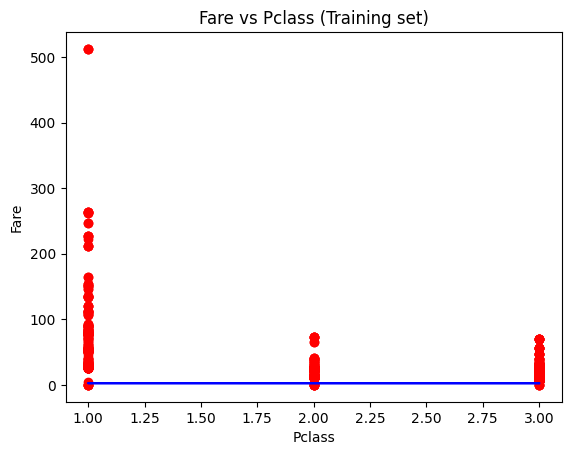

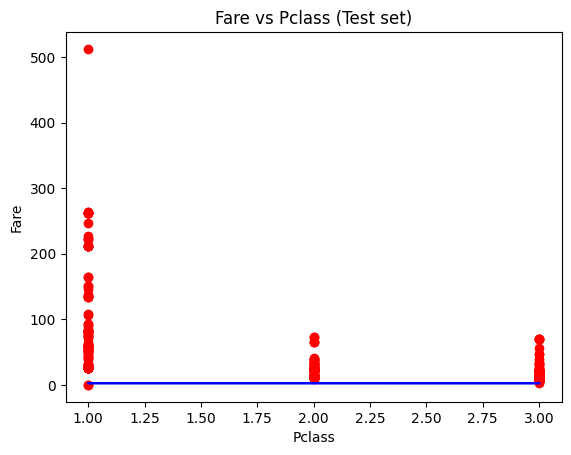

In [25]:
y_pred = regressor.predict(X_test)
print(y_pred)
plt.scatter(X, y_without_nan, color = 'red')
plt.plot(X, regressor.predict(X.reshape(-1, 1)), color = 'blue')
plt.title('Fare vs Pclass (Training set)')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X, regressor.predict(X.reshape(-1, 1)), color = 'blue')
plt.title('Fare vs Pclass (Test set)')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

### Использование модели

In [26]:
Fare = [[100]]

regressor.predict(Fare)


array([1.68186295])

In [27]:
a = regressor.coef_
b = regressor.intercept_
Fare = 100

Pclass  = a * Fare + b 
Pclass

array([1.68186295])

## Контрольные вопросы

**1. Почему при реализации линейной модели регрессии нет необходимости выполнять масштабирование признаков?**

- При реализации линейной модели регрессии нет необходимости выполнять масштабирование признаков, потому что линейная регрессия сама по себе не зависит от масштаба признаков. Это происходит из-за того, что коэффициенты регрессии (веса) в итоговой модели масштабируются так, чтобы учесть разные масштабы признаков. Если бы вы использовали модели, которые чувствительны к масштабу, например, метод ближайших соседей, то масштабирование признаков могло бы быть важным.


**2. Почему при реализации модели линейной регрессии в качестве функции потерь используется квадратичное отклонение, а не модуль отклонения?**

- В линейной регрессии используется квадратичное отклонение (среднеквадратичная ошибка, MSE) как функция потерь, а не модуль отклонения (среднее абсолютное отклонение, MAE), потому что MSE обладает математическими свойствами, которые делают его более подходящим для обучения и оптимизации модели линейной регрессии. Он является дифференцируемым и выпуклым, что упрощает задачу оптимизации параметров модели. MAE может использоваться, если вы хотите создать модель, которая более устойчива к выбросам, но в большинстве случаев MSE предпочтительнее.


**3. Что именно реализовано в методе fit(X, y) класса LinearRegression?**

Метод fit(X, y) класса LinearRegression выполняет обучение модели на обучающих данных. Он принимает матрицу признаков X и вектор целевых значений y как входные данные. Внутри метода происходит вычисление оптимальных весов (коэффициентов) для линейной модели, чтобы минимизировать функцию потерь (MSE) на предоставленных данных. После вызова метода fit, модель готова для предсказаний.


**4. Поясните назначение метода predict класса LinearRegression.**

- Метод predict класса LinearRegression используется для выполнения предсказаний на новых данных. Он принимает матрицу признаков X_new в качестве входных данных и возвращает предсказанные значения регрессии для этих данных. Этот метод использует обученные веса, которые были вычислены при вызове fit, чтобы выполнить предсказания.


**5. По какой подвыборке необходимо оценивать точность модели машинного обучения: тестовой или тренировочной?**

- Точность модели машинного обучения оценивается на тестовой подвыборке. Это делается для того, чтобы проверить, как хорошо модель обобщает данные, которые она ранее не видела. Оценка на тренировочной подвыборке может дать завышенную оценку точности, так как модель могла запомнить обучающие данные и не способна будет обобщать на новые данные. Тестовая выборка служит для проверки обобщающей способности модели.